<a href="https://colab.research.google.com/github/lucaslau77/PO/blob/main/Portfolio_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
# Import Python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [120]:
# Get ticker symbols
assets =  ["WYNN", "CRM", "SWKS"]
# assets =  ["CRSR"]

# Assign weights to each stock
weights = np.array([0.1268, 0.1600, 0.3916])
# weights = np.array([1])

In [121]:
# Get the portfolio starting date
stockStartDate = '2013-01-01'

# Get the portfolio ending date
today = datetime.today().strftime('%Y-%m-%d')

In [123]:
# Create a dataframe to store the adjusted close price of stocks
df = pd.DataFrame()

# Store the adjusted close price of each stock into df
for stock in assets:
   df[stock] = web.DataReader(stock,data_source='yahoo',start=stockStartDate , end=today)['Adj Close']

# Show the df
df

,WYNN,CRM,SWKS
Date,,,
2013-01-02,96.279900,42.792500,19.570084
2013-01-03,97.315514,42.177502,19.425457
2013-01-04,98.489761,42.402500,18.937344
2013-01-07,98.824097,42.244999,19.217558
2013-01-08,98.742554,42.492500,18.449221
...,...,...,...
2021-06-11,127.169998,240.309998,171.119995
2021-06-14,124.949997,246.259995,173.830002
2021-06-15,125.400002,242.580002,171.660004


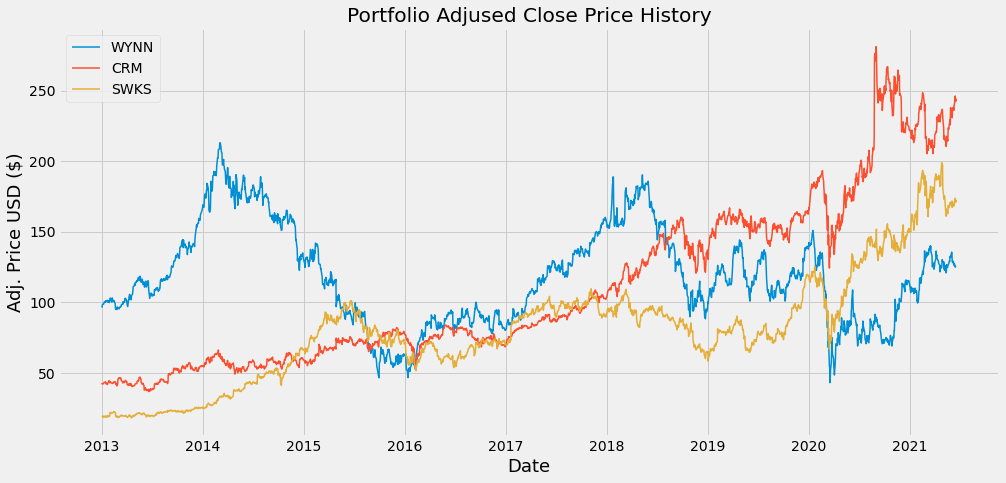

In [ ]:
# Show the portfolio
title = 'Portfolio Adjused Close Price History'

# Get the stocks
my_stocks = df

# Create and plot the graph
plt.figure(figsize=(15.0, 7.0)) #width = 15.0 in, height = 7.0 in

# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c], linewidth=1.5, label=c) # plt.plot( X-Axis, Y-Axis, linewidth, alpha_for_blending, label)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [ ]:
# Show the daily simple returns, NOTE: Returns = new_price/old_price - 1
returns = df.pct_change()
returns

,WYNN,CRM,SWKS
Date,,,
2013-01-02,NaN,NaN,NaN
2013-01-03,0.010756,-0.014372,-0.007390
2013-01-04,0.012066,0.005335,-0.025128
2013-01-07,0.003395,-0.003714,0.014797
2013-01-08,-0.000825,0.005859,-0.039981
...,...,...,...
2021-06-11,0.007926,0.000500,0.010094
2021-06-14,-0.017457,0.024760,0.015837
2021-06-15,0.003601,-0.014944,-0.012483


In [ ]:
# Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,WYNN,CRM,SWKS
WYNN,0.230677,0.047228,0.066311
CRM,0.047228,0.111983,0.057571
SWKS,0.066311,0.057571,0.150507


In [ ]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.04537193805997354

In [ ]:
# Calculate the portfolio volatility (standard deviation)
port_volatility = np.sqrt(port_variance)
port_volatility

0.21300689674274292

In [ ]:
# Calculate the portfolio expected annual return
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

0.1907745720155011

In [ ]:
# Show the calculations
percent_var = str(round(port_variance, 3) * 100) + '%'
percent_vols = str(round(port_volatility, 3) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 3)*100) + '%'
print("Expected annual return : " + percent_ret)
print('Annual volatility/standard deviation/risk : ' + percent_vols)
print('Annual variance : ' + percent_var)

Expected annual return : 19.1%
Annual volatility/standard deviation/risk : 21.3%
Annual variance : 4.5%
